In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [58]:
data = pd.read_csv('./table.csv')

In [63]:
set(data['t1']), set(data['t2'])

({50, 150, 350, 400, 500, 600, 700}, {150, 250, 450, 500, 600, 700, 800})

In [55]:
line_set=data.loc[data.query('t1==500 & t2==500').index]
line_set

,t1,t2,count,dist,ang
32159,500,500,49,497,0.052360
32160,500,500,49,504,0.069813
32161,500,500,49,564,1.710420
32162,500,500,49,245,1.535890
32163,500,500,49,125,0.034907
32164,500,500,49,570,1.692970
32165,500,500,49,242,1.553340
32166,500,500,49,119,0.017453


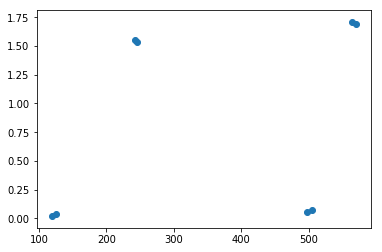

In [106]:
line_set=data.loc[data.query('t1==500 & t2==500').index]
plt.scatter(line_set.dist, line_set.ang)

In [154]:
def get_data(t1, t2):
    return data.loc[data.query('t1==%s & t2==%s' % (t1, t2)).index]

def normalize_data(line_set):
    df=line_set[['dist', 'ang']]
    return pd.DataFrame({'dist': 3.14 * df['dist'] / max(df['dist']), 'ang':df['ang']})

df=normalize_data(get_data(600,700))
df

,dist,ang
32270,2.737860,0.052360
32271,2.776421,0.069813
32272,3.106947,1.710420
32273,1.349649,1.535890
32274,3.140000,1.692970


[[2.73785965 0.0523599 ]
 [3.12347368 1.701695  ]
 [1.34964912 1.53589   ]
 [2.77642105 0.0698132 ]]


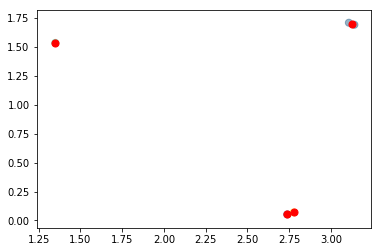

In [155]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['dist'], df['ang'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [146]:
def clustering_goodness(clustering):
    return [
        df[kmeans.labels_==i].var().sum()
        for i in set(clustering.labels_)
    ]
clustering_goodness(kmeans)

[0.0006985470675918131,
 0.0006984894771468163,
 0.0008957997607281586,
 0.00028881080678670734]

In [151]:
res = []
for t1 in set(data['t1']):
    for t2 in set(data['t2']):
        df = normalize_data(get_data(t1, t2))
        if df.shape[0] < 4:
            continue
        kmeans = KMeans(n_clusters=4).fit(df)
        goodness = clustering_goodness(kmeans)
        res += [(t1, t2, np.mean(goodness))]

In [153]:
sorted(res, key=lambda a: a[2])

[(600, 800, 0.00017462236928670406),
 (600, 700, 0.00017462236928670406),
 (700, 600, 0.00017462236928670406),
 (500, 800, 0.00039857230946874374),
 (500, 700, 0.00039857230946874374),
 (600, 600, 0.00039857230946874374),
 (700, 500, 0.00039857230946874374),
 (400, 800, 0.0004707750111654205),
 (500, 600, 0.0004707750111654206),
 (600, 500, 0.0004707750111654206),
 (700, 450, 0.0004707750111654206),
 (350, 800, 0.0006454117780633737),
 (500, 500, 0.0006454117780633739),
 (400, 700, 0.008831542543114605),
 (600, 450, 0.011684407951333414),
 (400, 600, 0.028004653477585472),
 (350, 700, 0.055348151843459516),
 (500, 250, 0.16656724985319835),
 (150, 450, 0.16866699100042312),
 (600, 250, 0.16882995163047884),
 (350, 500, 0.17018542605829445),
 (350, 450, 0.17033789821645517),
 (400, 450, 0.1780311636516225),
 (150, 150, 0.18253241526281205),
 (50, 500, 0.1835477539866628),
 (350, 600, 0.1871990745381401),
 (400, 500, 0.18919417752724257),
 (700, 250, 0.19396788293789063),
 (150, 700, 0.1